# Check GPU


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)



Wed May 31 18:55:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Install packages and Libraries




In [ ]:
! pip install pycocotools

# Imports

In [ ]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import random
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import torch

### For visualizing the outputs ###
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from PIL import Image
import torchvision.transforms as transforms
from torch import Tensor



# Mount Google Drive

In [20]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Extract Dataset

In [ ]:
# Create folder for saving checkpoints, if doesn't exist yet

! mkdir -p '/content/drive/MyDrive/252d_segmentation_data/

In [23]:
# Please enter the path to the zip file

! unzip "/content/drive/MyDrive/252D_mini_project_PMKR/style-coco.tar.xz.zip" -d "/content"

Archive:  /content/drive/MyDrive/252D_mini_project_PMKR/style-coco.tar.xz.zip
  inflating: /content/style-coco.tar.xz  


In [ ]:
! tar -xvf "/content/style-coco.tar.xz" -C "/content"

# Retrieve and show an image

loading annotations into memory...
Done (t=0.20s)
creating index...
index created!
[{'supercategory': 'person', 'id': 1, 'name': 'person'}, {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}, {'supercategory': 'vehicle', 'id': 3, 'name': 'car'}, {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}, {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}, {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}, {'supercategory': 'vehicle', 'id': 7, 'name': 'train'}, {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}, {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}, {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}, {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}, {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}, {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}, {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}, {'supercategory': 'animal', 'id': 16, 'name': 'bird'}, {'supercategory': 'animal', 'id': 17, 'n

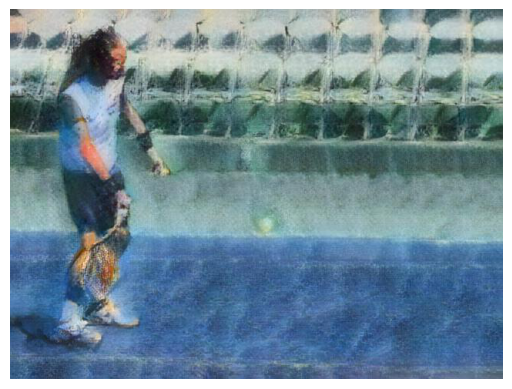

In [ ]:
# dataDir = '/content/style-coco'
# dataType = 'val'

# annFile = f'{dataDir}/annotations/style_{dataType}2017.json'
# coco = COCO(annFile)

# catIDs = coco.getCatIds()
# cats = coco.loadCats(catIDs)
# print(cats)

# def getClassName(classID, cats):
#     for i in range(len(cats)):
#         if cats[i]['id']==classID:
#             return cats[i]['name']
#     return "None"



# # Get images containing person
# # Define the classes (out of the 81) which you want to see. Others will not be shown.
# filterClasses = ['person']

# # Fetch class IDs only corresponding to the filterClasses
# catIds = coco.getCatIds(catNms=filterClasses) 
# # Get all images containing the above Category IDs
# imgIds = coco.getImgIds(catIds=catIds)
# print("Number of images containing all the  classes:", len(imgIds))

# # load and display a random image
# # index = np.random.randint(0,len(imgIds))
# index = 1000
# img = coco.loadImgs(imgIds[index])[0]
# I = io.imread(f"{dataDir}/{dataType}2017/{img['file_name']}")/255.0

# plt.axis('off')
# plt.imshow(I)
# plt.show()



# Overlay image with segmentation mask

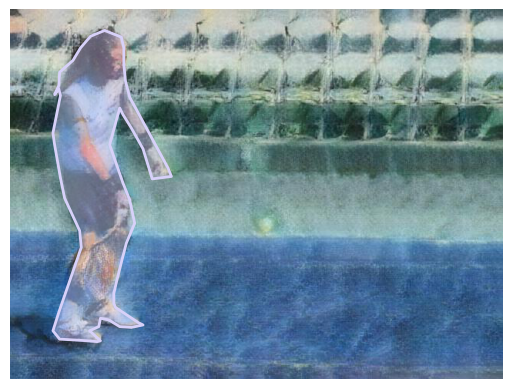

In [ ]:
# plt.imshow(I)
# plt.axis('off')
# annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
# anns = coco.loadAnns(annIds)
# coco.showAnns(anns)

# Ground truth segmentation mask

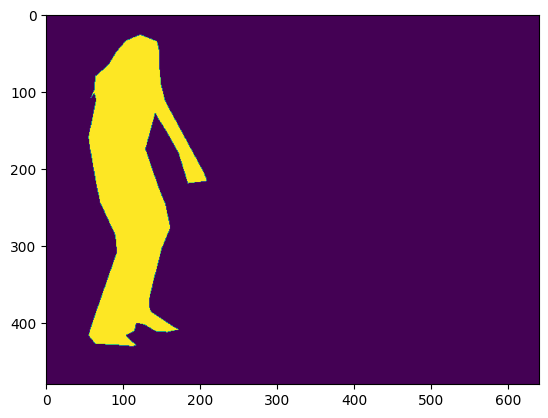

In [ ]:
# filterClasses = ['person']
# mask = np.zeros((img['height'], img['width']))
# for i in range(len(anns)):
#   className = getClassName(anns[i]['category_id'], cats)
#   pixel_value = filterClasses.index(className) + 1
#   mask = np.maximum(coco.annToMask(anns[i])*pixel_value, mask)
  
# plt.imshow(mask)



# Creating Dataset class


In [ ]:
# dataDir = '/content/style-coco'
# dataType = 'train'

# annFile_train = f'{dataDir}/annotations/style_{dataType}2017.json'
# coco = COCO(annFile_train)

loading annotations into memory...
Done (t=5.68s)
creating index...
index created!


Number of images containing all the  classes: 58671
(640, 428)


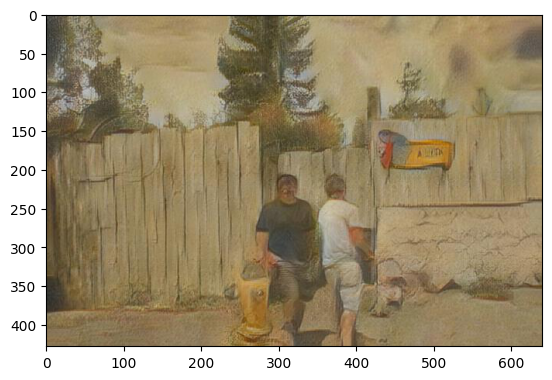

(428, 640)
(428, 640)
(428, 640)


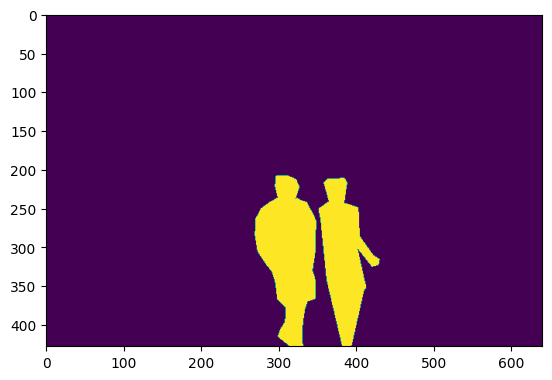

In [ ]:


# catIDs = coco.getCatIds()
# cats = coco.loadCats(catIDs)
# # print(cats)

# def getClassName(classID, cats):
#     for i in range(len(cats)):
#         if cats[i]['id']==classID:
#             return cats[i]['name']
#     return "None"



# # Get images containing person
# # Define the classes (out of the 81) which you want to see. Others will not be shown.
# filterClasses = ['person']

# # Fetch class IDs only corresponding to the filterClasses
# catIds = coco.getCatIds(catNms=filterClasses) 

# #################################Images for training!!! ########################################
# # Get all images containing the above Category IDs
# imgIds_train = coco.getImgIds(catIds=catIds)
# #################################Images for training!!! ########################################

# print("Number of images containing all the  classes:", len(imgIds_train))

# # load and display a random image
# # index = np.random.randint(0,len(imgIds))
# index = 1001
# img = coco.loadImgs(imgIds_train[index])[0]
# I = Image.open(f"{dataDir}/{dataType}2017/{img['file_name']}")

# # I = np.array(I)

# topil = transforms.ToPILImage()
# # I = topil(I)
# resize = transforms.Resize(size = (img['height'], img['width']))
# I = resize(I)
# print(I.size)
# # plt.axis('off')
# plt.imshow(I)
# plt.show()

# annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
# anns = coco.loadAnns(annIds)
# filterClasses = ['person']
# mask = np.zeros((img['height'], img['width']))
# print(mask.shape)
# for i in range(len(anns)):
#   className = getClassName(anns[i]['category_id'], cats)
#   pixel_value = filterClasses.index(className) + 1
#   print(coco.annToMask(anns[i]).shape)
#   mask = np.maximum(coco.annToMask(anns[i])*pixel_value, mask)

# mask = mask.astype(np.uint8)

# # mask = resize(topil(mask))


# plt.imshow(mask)
# # plt.axis('off')

In [ ]:
from torch.utils.data import Dataset

def getClassName(classID, cats):
    for i in range(len(cats)):
        if cats[i]['id']==classID:
            return cats[i]['name']
    return "None"

class BasicDataset(Dataset):
  def __init__(self, coco, img_indexes, filter_classes,dataDir, dataType, cats, catIds,scale: float=1.0):
    self.img_indexes = img_indexes
    self.scale = scale
    self.mask_values = np.linspace(0, 1, num=2)
    self.dataDir = dataDir
    self.dataType = dataType
    self.cats = cats
    self.catIds = catIds
    self.coco = coco
    self.filter_classes = filter_classes

  @staticmethod
  def preprocess(mask_values, pil_img, scale, is_mask):
    # will not resize for now. Lets see if it works. U net is fully convolutional so it may work without resizing
      w, h = pil_img.size
      newW, newH = int(scale * w), int(scale * h)
      pil_img = pil_img.resize((newW, newH), resample=Image.NEAREST if is_mask else Image.BICUBIC)
      img = np.asarray(pil_img)
      if is_mask:
          mask = np.zeros((newH, newW), dtype=np.int64)
          for i, v in enumerate(mask_values):
              if img.ndim == 2:
                  mask[img == v] = i
              else:
                  mask[(img == v).all(-1)] = i

          return mask

      else:
          if img.ndim == 2:
              img = img[np.newaxis, ...]
          else:
              img = img.transpose((2, 0, 1))

          if (img > 1).any():
              img = img / 255.0

          return img


  def __len__(self):
    return len(self.img_indexes)

  def __getitem__(self, idx):
    img = self.coco.loadImgs(self.img_indexes[idx])[0]
    I = Image.open(f"{self.dataDir}/{self.dataType}2017/{img['file_name']}")
    resize = transforms.Resize(size = (img['height'], img['width']))

    mask = np.zeros((img['height'], img['width']))
    annIds = self.coco.getAnnIds(imgIds=img['id'], catIds=self.catIds, iscrowd=None)
    anns = self.coco.loadAnns(annIds)
    for i in range(len(anns)):
      className = getClassName(anns[i]['category_id'], self.cats)
      pixel_value = self.filter_classes.index(className) + 1
      mask = np.maximum(self.coco.annToMask(anns[i])*pixel_value, mask)

    topil = transforms.ToPILImage()
    mask = mask.astype(np.uint8)
    mask = topil(mask)

    I = resize(I)
    mask = resize(mask)

    resize_512 = transforms.Resize(size = (512, 512))

    I = resize_512(I)
    mask = resize_512(mask)

    image = self.preprocess(self.mask_values, I, self.scale, is_mask=False)
    mask = self.preprocess(self.mask_values, mask, self.scale, is_mask=True)


    return {
        'image': torch.as_tensor(image.copy()).float().contiguous(),
        'mask': torch.as_tensor(mask.copy()).long().contiguous()
    }

In [ ]:
# 

# train_dataset = BasicDataset(coco, imgIds_train, dataDir, dataType, cats, catIds, scale=1.0)
# plt.figure(1)
# plt.imshow(topil(train_dataset[0]['image']))
# plt.figure(2)
# plt.imshow(train_dataset[0]['mask'].numpy())

# 


# Dice Loss

In [ ]:
def dice_coeff(input: Tensor, target: Tensor, reduce_batch_first: bool = False, epsilon: float = 1e-6):
    # Average of Dice coefficient for all batches, or for a single mask
    assert input.size() == target.size()
    assert input.dim() == 3 or not reduce_batch_first

    sum_dim = (-1, -2) if input.dim() == 2 or not reduce_batch_first else (-1, -2, -3)

    inter = 2 * (input * target).sum(dim=sum_dim)
    sets_sum = input.sum(dim=sum_dim) + target.sum(dim=sum_dim)
    sets_sum = torch.where(sets_sum == 0, inter, sets_sum)

    dice = (inter + epsilon) / (sets_sum + epsilon)
    return dice.mean()


def multiclass_dice_coeff(input: Tensor, target: Tensor, reduce_batch_first: bool = False, epsilon: float = 1e-6):
    # Average of Dice coefficient for all classes
    return dice_coeff(input.flatten(0, 1), target.flatten(0, 1), reduce_batch_first, epsilon)


def dice_loss(input: Tensor, target: Tensor, multiclass: bool = False):
    # Dice loss (objective to minimize) between 0 and 1
    fn = multiclass_dice_coeff if multiclass else dice_coeff
    return 1 - fn(input, target, reduce_batch_first=True)

# Model DeepLabv3+

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torch.nn import AdaptiveAvgPool2d, MaxPool2d, Conv2d, BatchNorm2d, ReLU, Upsample, ModuleList
from torchvision import models
import warnings
import ssl
from collections import OrderedDict
ssl._create_default_https_context = ssl._create_unverified_context


class DeepLabV3Plus(nn.Module):
    def __init__(self, n_classes, n_channels, bilinear):
        super(DeepLabV3Plus, self).__init__()
        self.n_classes = n_classes
        self.n_channels = n_channels
        self.bilinear = bilinear

        # ENCODER
        # load in pretrained model
        resnet = torchvision.models.resnet50(weights='ResNet50_Weights.DEFAULT')

        # freeze pretrained layers
        for param in resnet.parameters():
            param.requires_grad = False

        # pre-residual layers
        self.in_conv = resnet.conv1
        self.in_bn = resnet.bn1
        self.in_relu = resnet.relu
        self.in_maxpool = resnet.maxpool
        self.begin_resnet_layers = nn.ModuleList([resnet.conv1, resnet.bn1, resnet.relu, resnet.maxpool])

        # resnet high-level
        self.resnet_4_layers = nn.ModuleList([resnet.layer1, resnet.layer2, resnet.layer3 , resnet.layer4])
        features_4 = self.begin_resnet_layers + self.resnet_4_layers
        self.resnet_4 = torch.nn.Sequential(*features_4)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        # print(self.resnet_4_layers)

        # ASPP
        # 1 x 1 conv
        self.aspp_conv1 = Conv2d(2048, 256, kernel_size=1, padding='same', bias=False)
        self.aspp_bn1 = BatchNorm2d(256)
        self.relu = ReLU(inplace=True)

        # 3 x 3 conv, rate 6
        self.aspp_conv3_r6 = Conv2d(256, 256, 3, padding=6, dilation=6, bias=False)
        # 3 x 3 conv, rate 12
        self.aspp_conv3_r12 = Conv2d(256, 256, 3, padding=12, dilation=12, bias=False)
        # 3 x 3 conv, rate 18
        self.aspp_conv3_r18 = Conv2d(256, 256, 3, padding=18, dilation=18, bias=False)
        # image pooling
        self.aspp_pool = AdaptiveAvgPool2d((8, 8))

        # ENCODER OUT
        # concat ASPP
        if self.bilinear:
          self.upsample_resnet = Upsample(scale_factor=32, mode='bilinear')
        else:
          self.upsample_resnet = Upsample(scale_factor=32)

        # 1x1 conv ASPP
        self.conv1_encoder = Conv2d(5 * 256, 256, 1, bias=False)
        self.b1_encoder = BatchNorm2d(256)

        # resnet low-level
        self.resnet_2_layers = ModuleList([resnet.layer1, resnet.layer2])
        features_2 = self.begin_resnet_layers + self.resnet_2_layers
        self.resnet_2 = torch.nn.Sequential(*features_2)

        # DECODER
        # resnet output 1x1 conv
        self.low_level_conv = Conv2d(512, 256, 1, bias=False)
        self.low_level_bn = BatchNorm2d(256)
        
        # upsample conv'd ASPP output
        if self.bilinear:
          self.upsample_encoder = Upsample(scale_factor=4, mode='bilinear')
        else:
          self.upsample_encoder = Upsample(scale_factor=4) 

        # concat resnet + ASPP
        # 3 x 3 conv
        self.conv3_decoder = Conv2d(512, self.n_classes, 3, padding=1, bias=False)
        self.bn_decoder = BatchNorm2d(self.n_classes)

        # upsample by 4
        if self.bilinear:
          self.upsample_decoder = Upsample(scale_factor=8, mode='bilinear')
        else:
          self.upsample_decoder = Upsample(scale_factor=8) 

    def forward(self, input):

        x1 = self.in_conv(input)
        x1 = self.in_bn(x1)
        x1 = self.in_relu(x1)

        pre_resnet = self.in_maxpool(x1)

        in_vals, out_resnet4 = 0, 0
        for i, layer in enumerate(self.resnet_4_layers):
            if i == 0:
                in_vals = pre_resnet
            else:
                in_vals = out_resnet4
            out_resnet4 = layer(in_vals)

        x2 = self.aspp_conv1(out_resnet4)
        x2 = self.aspp_bn1(x2)
        aspp_conv1_output = self.relu(x2)

        x3 = self.aspp_conv3_r6(aspp_conv1_output)
        x3 = self.aspp_bn1(x3)
        aspp_conv3_r6_output = self.relu(x3)

        x4 = self.aspp_conv3_r12(aspp_conv3_r6_output)
        x4 = self.aspp_bn1(x4)
        aspp_conv3_r12_output = self.relu(x4)

        x5 = self.aspp_conv3_r18(aspp_conv3_r12_output)
        x5 = self.aspp_bn1(x5)
        aspp_conv3_r18_output = self.relu(x5)

        aspp_pool_output = self.aspp_pool(aspp_conv3_r18_output)

        aspp_pyramid = [aspp_conv1_output, aspp_conv3_r6_output, aspp_conv3_r12_output, aspp_conv3_r18_output, aspp_pool_output]
        aspp_concat = torch.cat(aspp_pyramid, dim=1)

        x6 = self.conv1_encoder(aspp_concat)
        x6 = self.b1_encoder(x6)
        x6 = self.relu(x6)

        upsampled_encoder = self.upsample_encoder(x6)

        in_vals, out_resnet2 = 0, 0
        for i, layer in enumerate(self.resnet_2_layers):
            if i == 0:
                in_vals = pre_resnet
            else:
                in_vals = out_resnet2
            out_resnet2 = layer(in_vals)

        x7 = self.low_level_conv(out_resnet2)
        x7 = self.low_level_bn(x7)
        low_level = self.relu(x7)

        decoder_concat = torch.cat([low_level, upsampled_encoder], dim=1)

        x8 = self.conv3_decoder(decoder_concat)
        x8 = self.bn_decoder(x8)
        x8 = self.relu(x8)

        output = self.upsample_decoder(x8)

        return output

# Training

In [ ]:
!pip install wandb

In [ ]:
import argparse
import logging
import os
import random
import sys
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
from pathlib import Path
from torch import optim
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
from torch import Tensor
import wandb
from google.colab import files

In [ ]:
import torch
import torch.nn.functional as F
from tqdm import tqdm

@torch.inference_mode()
def evaluate(net, dataloader, device, amp):
    net.eval()
    num_val_batches = len(dataloader)
    dice_score = 0

    # iterate over the validation set
    with torch.autocast(device.type if device.type != 'mps' else 'cpu', enabled=amp):
        for batch in tqdm(dataloader, total=num_val_batches, desc='Validation round', unit='batch', leave=False):
            image, mask_true = batch['image'], batch['mask']

            # move images and labels to correct device and type
            image = image.to(device=device, dtype=torch.float32, memory_format=torch.channels_last)
            mask_true = mask_true.to(device=device, dtype=torch.long)

            # predict the mask
            mask_pred = net(image)
            # print(mask_pred.size())
            # print(mask_true.size())

            if net.n_classes == 1:
                assert mask_true.min() >= 0 and mask_true.max() <= 1, 'True mask indices should be in [0, 1]'
                mask_pred = (F.sigmoid(mask_pred.squeeze(1)) > 0.5).float()
                # compute the Dice score
                dice_score += dice_coeff(mask_pred, mask_true, reduce_batch_first=False)
            else:
                assert mask_true.min() >= 0 and mask_true.max() < net.n_classes, 'True mask indices should be in [0, n_classes['
                # convert to one-hot format
                mask_true = F.one_hot(mask_true, net.n_classes).permute(0, 3, 1, 2).float()
                mask_pred = F.one_hot(mask_pred.argmax(dim=1), net.n_classes).permute(0, 3, 1, 2).float()
                # compute the Dice score, ignoring background
                dice_score += multiclass_dice_coeff(mask_pred[:, 1:], mask_true[:, 1:], reduce_batch_first=False)

    net.train()
    return dice_score / max(num_val_batches, 1)

In [ ]:
import argparse
import logging
import os
import random
import sys
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
from pathlib import Path
from torch import optim
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm

import wandb

In [ ]:
dir_checkpoint = Path('/content/drive/MyDrive/252d_segmentation_data/')

def train_model(
        model,
        device,
        epochs: int = 5,
        batch_size: int = 1,
        learning_rate: float = 1e-5,
        val_percent: float = 0.1,
        save_checkpoint: bool = True,
        img_scale: float = 0.5,
        amp: bool = False,
        weight_decay: float = 1e-8,
        momentum: float = 0.999,
        gradient_clipping: float = 1.0,
):
  
  dataDir = "/content/style-coco"
  annFile_train = f'{dataDir}/annotations/style_train2017.json'
  annFile_val = f'{dataDir}/annotations/style_val2017.json'
  coco_train = COCO(annFile_train)
  coco_val = COCO(annFile_val)
  filterClasses = ['person']

  catIDDDs_train = coco_train.getCatIds()
  cats_train = coco_train.loadCats(catIDDDs_train)
  catIDDDs_val = coco_val.getCatIds()
  cats_val = coco_val.loadCats(catIDDDs_val)


  catIds_train = coco_train.getCatIds(catNms=filterClasses) 
  catIds_val = coco_val.getCatIds(catNms=filterClasses) 

  imgIds_train = coco_train.getImgIds(catIds=catIds_train)
  imgIds_val = coco_val.getImgIds(catIds=catIds_val)


  train_dataset = BasicDataset(coco_train, imgIds_train, filterClasses, dataDir=dataDir, dataType="train", cats=cats_train, catIds=catIds_train, scale = img_scale)
  val_dataset = BasicDataset(coco_val, imgIds_val, filterClasses, dataDir=dataDir, dataType="val", cats=cats_val, catIds=catIds_val, scale = img_scale)
  
  n_train = len(train_dataset)
  n_val = len(val_dataset)

  loader_args = dict(batch_size=batch_size, num_workers=os.cpu_count(), pin_memory=True)
  train_loader = DataLoader(train_dataset, shuffle=True, **loader_args)
  val_loader = DataLoader(val_dataset, shuffle=False, drop_last=True, **loader_args)

  # (Initialize logging)
  experiment = wandb.init(project='DeepLabv3+', resume='allow', anonymous='must')
  experiment.config.update(
      dict(epochs=epochs, batch_size=batch_size, learning_rate=learning_rate,
            val_percent=val_percent, save_checkpoint=save_checkpoint, img_scale=img_scale, amp=amp)
  )

  logging.info(f'''Starting training:
      Epochs:          {epochs}
      Batch size:      {batch_size}
      Learning rate:   {learning_rate}
      Training size:   {n_train}
      Validation size: {n_val}
      Checkpoints:     {save_checkpoint}
      Device:          {device.type}
      Images scaling:  {img_scale}
      Mixed Precision: {amp}
  ''')

  # 4. Set up the optimizer, the loss, the learning rate scheduler and the loss scaling for AMP
  optimizer = optim.Adam(model.parameters(),
                            lr=learning_rate, weight_decay=weight_decay, foreach=True)
  scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=5)  # goal: maximize Dice score
  grad_scaler = torch.cuda.amp.GradScaler(enabled=amp)
  criterion = nn.CrossEntropyLoss() if model.n_classes > 1 else nn.BCEWithLogitsLoss()
  global_step = 0

  # 5. Begin training
  for epoch in range(1, epochs + 1):
      model.train()
      epoch_loss = 0
      with tqdm(total=n_train, desc=f'Epoch {epoch}/{epochs}', unit='img') as pbar:
          for batch in train_loader:
              images, true_masks = batch['image'], batch['mask']


              assert images.shape[1] == model.n_channels, \
                  f'Network has been defined with {model.n_channels} input channels, ' \
                  f'but loaded images have {images.shape[1]} channels. Please check that ' \
                  'the images are loaded correctly.'

              images = images.to(device=device, dtype=torch.float32, memory_format=torch.channels_last)
              true_masks = true_masks.to(device=device, dtype=torch.long)

              with torch.autocast(device.type if device.type != 'mps' else 'cpu', enabled=amp):
                  masks_pred = model(images)
 
                  if model.n_classes == 1:
                      cri = criterion(masks_pred.squeeze(1), true_masks.float())
                      dice = dice_loss(F.sigmoid(masks_pred.squeeze(1)), true_masks.float(), multiclass=False)
                      if cri is None:
                        print("Criterion is None")
                      if dice is None:
                        print("dice is None")
                      loss = cri
                      loss += dice
                  else:
                      loss = criterion(masks_pred, true_masks)
                      loss += dice_loss(
                          F.softmax(masks_pred, dim=1).float(),
                          F.one_hot(true_masks, model.n_classes).permute(0, 3, 1, 2).float(),
                          multiclass=True
                      )

              optimizer.zero_grad(set_to_none=True)
              grad_scaler.scale(loss).backward()
              torch.nn.utils.clip_grad_norm_(model.parameters(), gradient_clipping)
              grad_scaler.step(optimizer)
              grad_scaler.update()

              pbar.update(images.shape[0])
              global_step += 1
              epoch_loss += loss.item()
              experiment.log({
                  'train loss': loss.item(),
                  'step': global_step,
                  'epoch': epoch
              })
              pbar.set_postfix(**{'loss (batch)': loss.item()})

              # Evaluation round
              division_step = (n_train // (5 * batch_size))
              if division_step > 0:
                  if global_step % division_step == 0:
                      histograms = {}
                      for tag, value in model.named_parameters():
                          tag = tag.replace('/', '.')
                          if not (torch.isinf(value) | torch.isnan(value)).any():
                              histograms['Weights/' + tag] = wandb.Histogram(value.data.cpu())
                          if not (torch.isinf(value.grad) | torch.isnan(value.grad)).any():
                              histograms['Gradients/' + tag] = wandb.Histogram(value.grad.data.cpu())

                      val_score = evaluate(model, val_loader, device, amp)
                      scheduler.step(val_score)

                      logging.info('Validation Dice score: {}'.format(val_score))
                      try:
                          experiment.log({
                              'learning rate': optimizer.param_groups[0]['lr'],
                              'validation Dice': val_score,
                              'images': wandb.Image(images[0].cpu()),
                              'masks': {
                                  'true': wandb.Image(true_masks[0].float().cpu()),
                                  'pred': wandb.Image(masks_pred.argmax(dim=1)[0].float().cpu()),
                              },
                              'step': global_step,
                              'epoch': epoch,
                              **histograms
                          })
                      except:
                          pass

      if save_checkpoint:
          Path(dir_checkpoint).mkdir(parents=True, exist_ok=True)
          state_dict = model.state_dict()
          state_dict['mask_values'] = train_dataset.mask_values
          torch.save(state_dict, str(dir_checkpoint / 'checkpoint_epoch{}.pth'.format(epoch)))
          logging.info(f'Checkpoint {epoch} saved!')





Run training

In [ ]:
load = False
epochs = 25
classes = 1
bilinear = True
batch_size = 64
lr = 1e-3
scale = 0.5
amp = True

logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
logging.info(f'Using device {device}')

# Change here to adapt to your data
# n_channels=3 for RGB images
# n_classes is the number of probabilities you want to get per pixel
model = DeepLabV3Plus(n_channels=3, n_classes=classes, bilinear=bilinear)
model = model.to(memory_format=torch.channels_last)

logging.info(f'Network:\n'
            f'\t{model.n_channels} input channels\n'
            f'\t{model.n_classes} output channels (classes)\n'
            f'\t{"Bilinear" if model.bilinear else "Transposed conv"} upscaling')

if load:
  state_dict = torch.load(load, map_location=device)
  del state_dict['mask_values']
  model.load_state_dict(state_dict)
  logging.info(f'Model loaded from {load}')

model.to(device=device)
try:
  train_model(
      model=model,
      epochs=epochs,
      batch_size=batch_size,
      learning_rate=lr,
      device=device,
      img_scale=scale,
      val_percent= 1,
      amp=amp
  )
except torch.cuda.OutOfMemoryError:
  logging.error('Detected OutOfMemoryError! '
                'Enabling checkpointing to reduce memory usage, but this slows down training. '
                'Consider enabling AMP (--amp) for fast and memory efficient training')
  torch.cuda.empty_cache()
  model.use_checkpointing()
  train_model(
      model=model,
      epochs=epochs,
      batch_size=batch_size,
      learning_rate=lr,
      device=device,
      img_scale=scale,
      val_percent=1,
      amp=amp
  )

# Load model and test

In [ ]:
import argparse
import logging
import os

import numpy as np
import torch
import torch.nn.functional as F
from PIL import Image
from torchvision import transforms
def plot_img_and_mask(img, mask):
    classes = mask.max() + 1
    fig, ax = plt.subplots(1, classes + 1)
    ax[0].set_title('Input image')
    ax[0].imshow(img)
    for i in range(classes):
        ax[i + 1].set_title(f'Mask (class {i + 1})')
        ax[i + 1].imshow(mask == i)
    plt.xticks([]), plt.yticks([])
    plt.show()

def predict_img(net,
                full_img,
                device,
                scale_factor=1,
                out_threshold=0.5):
    net.eval()
    img = torch.from_numpy(BasicDataset.preprocess(None, full_img, scale_factor, is_mask=False))
    img = img.unsqueeze(0)
    img = img.to(device=device, dtype=torch.float32)

    with torch.no_grad():
        output = net(img).cpu()
        output = F.interpolate(output, (full_img.size[1], full_img.size[0]), mode='bilinear')
        if net.n_classes > 1:
            mask = output.argmax(dim=1)
        else:
            mask = torch.sigmoid(output) > out_threshold

    return mask[0].long().squeeze().numpy()


# Change image path here
img_path = "/content/drive/MyDrive/252D_mini_project_PMKR/test_image.jpg"
img = Image.open(img_path)

net = DeepLabV3Plus(n_channels=3, n_classes=classes, bilinear=bilinear)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net.to(device=device)

# Change model path here
path_to_model = "/content/drive/MyDrive/252D_mini_project_PMKR/deeplabv3plus_epoch6.pth"
state_dict = torch.load(path_to_model, map_location=device)
mask_values = state_dict.pop('mask_values', [0, 1])
net.load_state_dict(state_dict)

mask = predict_img(net=net, full_img=img, scale_factor=1.0, out_threshold=0.5, device=device)
plot_img_and_mask(img, mask)


